In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_excel("sample-superstore-subset-excel.xlsx")
# Display the first few rows 
df.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [35]:
#summary statistics
df.describe()                                                                           

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426,9426,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,2012-03-05 18:33:59.465308672,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272,82318.489073
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,2010-01-01 00:00:00,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,2011-03-07 06:00:00,2011-03-09 00:00:00,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2012-04-08 00:00:00,2012-04-09 00:00:00,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,2013-03-26 00:00:00,2013-03-28 00:00:00,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2013-12-31 00:00:00,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000,91591.000000
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,NaN,NaN,998.486483,15.107688,2598.019818,19149.448857


In [36]:

# Handle missing values
df.isnull().sum()




Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [37]:
# Convert data types if necessary
 #no need to change the data types
# just to Ensure  'Order Date' and 'Ship Date' columns are in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [38]:
# Create a 'Total Price' column: Final sales amount after discount
df.loc[:, 'Total Price'] = df['Sales'] - (df['Sales'] * df['Discount'])

# Create a 'Profit Margin' column in percentage
df.loc[:, 'Profit Margin'] = (df['Profit'] / df['Sales']) * 100



In [39]:
# Create any new columns needed for analysis
#final sales amount after applying discounts.
# 1. Create a 'Total Price' column
df['Total Price'] = df['Sales'] - (df['Sales'] * df['Discount'])

# 2. Create a 'Profit Margin' column (percentage)
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100


In [40]:
df = df.dropna()


Mean: 894.93
Median: 190.38
Mode: 19.07
Standard Deviation: 2485.09
Range: 97114.40


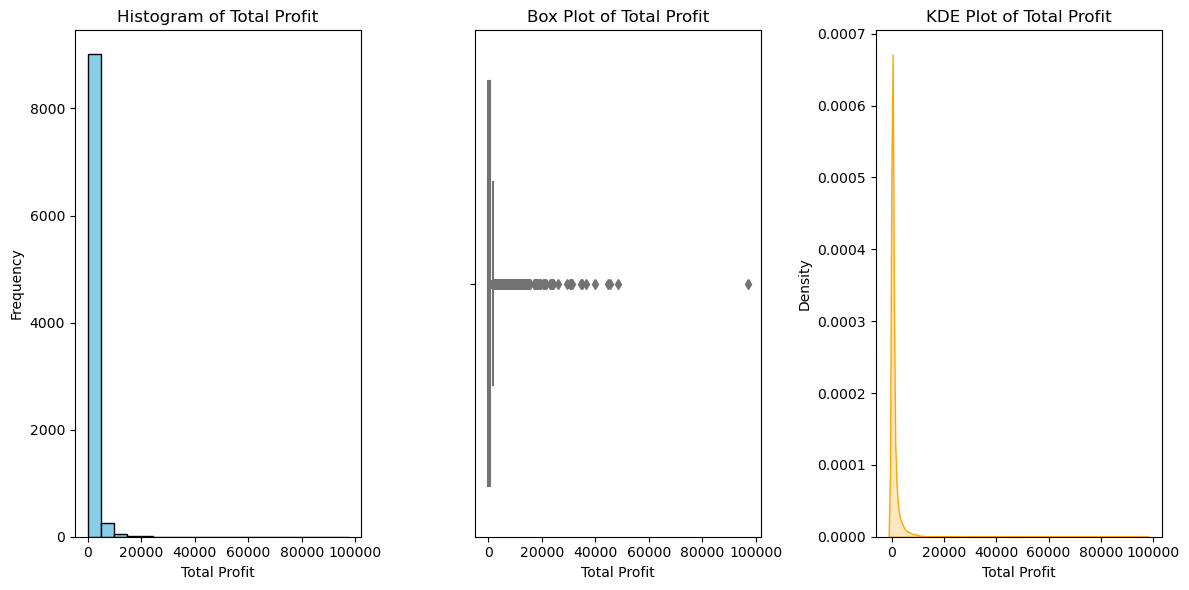

In [41]:

# Univariate analysis
# Descriptive Statistics
mean = df['Total Price'].mean()
median = df['Total Price'].median()
mode = df['Total Price'].mode()[0]
std_dev = df['Total Price'].std()
data_range = df['Total Price'].max() - df['Total Price'].min()

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Range: {data_range:.2f}")

# Data Visualization
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(df['Total Price'], bins=20, edgecolor='k', color='skyblue')
plt.title('Histogram of Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Total Price'], color='lightgreen')
plt.title('Box Plot of Total Profit')
plt.xlabel('Total Profit')

# KDE Plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['Total Price'], shade=True, color='orange')
plt.title('KDE Plot of Total Profit')
plt.xlabel('Total Profit')

plt.tight_layout()
plt.show()


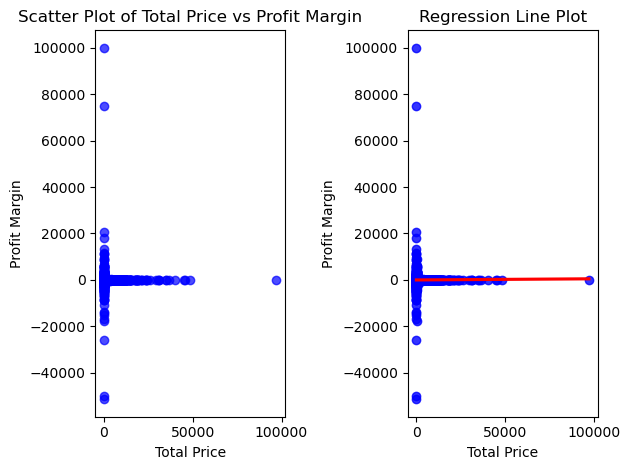

In [42]:
# Bivariate analysis

# Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(df['Total Price'], df['Profit Margin'], alpha=0.7, color='b')
plt.title('Scatter Plot of Total Price vs Profit Margin')
plt.xlabel('Total Price')
plt.ylabel('Profit Margin')

# Regression Line Plot
plt.subplot(1, 2, 2)
sns.regplot(x='Total Price', y='Profit Margin', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Regression Line Plot')
plt.xlabel('Total Price')
plt.ylabel('Profit Margin')

plt.tight_layout()
plt.show()

In [43]:

# Summary statistics for key variables
profit_data = df['Profit']

# Calculate mean (average) profit
mean_profit = profit_data.mean()
print(f"Mean Profit: {mean_profit:.2f}")

# Calculate median profit
median_profit = profit_data.median()
print(f"Median Profit: {median_profit:.2f}")

# Calculate standard deviation of profit
std_dev_profit = profit_data.std()
print(f"Standard Deviation (Profit): {std_dev_profit:.2f}")

# Calculate range (max - min) of profit
profit_range = profit_data.max() - profit_data.min()
print(f"Profit Range: {profit_range:.2f}")

# Calculate interquartile range (IQR) of profit
q1 = profit_data.quantile(0.25)
q3 = profit_data.quantile(0.75)
iqr_profit = q3 - q1
print(f"IQR (Profit): {iqr_profit:.2f}")

# Grouped statistics
grouped_data = df.groupby('Region')['Profit'].mean()
print(grouped_data)

Mean Profit: 136.89
Median Profit: 2.48
Standard Deviation (Profit): 991.93
Profit Range: 32809.25
IQR (Profit): 212.30
Region
Central    177.739563
East       162.642110
South       51.712562
West       132.156623
Name: Profit, dtype: float64



### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [44]:

from scipy.stats import ttest_ind, chi2_contingency
from scipy import stats


# Example: T-test for sales in different regions
 #Group sales data by region
central_sales = df[df['Region'] == 'Central']['Sales']
west_sales = df[df['Region'] == 'West']['Sales']
east_sales = df[df['Region'] == 'East']['Sales']
south_sales = df[df['Region'] == 'South']['Sales']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(central_sales, west_sales, east_sales, south_sales)

print(f"F-Statistic: {f_statistic:.2f}, P-Value: {p_value:.4f}")
#Interpretation
if p_value < 0.05:
    print("Significant difference in sales among regions")
else:
    print("No significant difference in sales among regions")



F-Statistic: 4.77, P-Value: 0.0025
Significant difference in sales among regions


In [45]:
# Create a contingency table
contingency_table = pd.crosstab(df['Ship Mode'], df['Customer Segment'])

print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between Ship Mode and Customer Segment.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Ship Mode and Customer Segment.")

Contingency Table:
Customer Segment  Consumer  Corporate  Home Office  Small Business
Ship Mode                                                         
Delivery Truck         258        458          299             251
Express Air            221        395          263             217
Regular Air           1399       2498         1738            1357

Chi-Square Statistic: 1.15
P-Value: 0.9793
Degrees of Freedom: 6
Expected Frequencies:
[[ 254.17447081  453.53495831  311.28928801  247.00128287]
 [ 220.0436177   392.63373958  269.48898867  213.83365405]
 [1403.78191148 2504.83130212 1719.22172333 1364.16506307]]
Fail to reject the null hypothesis: There is no significant association between Ship Mode and Customer Segment.


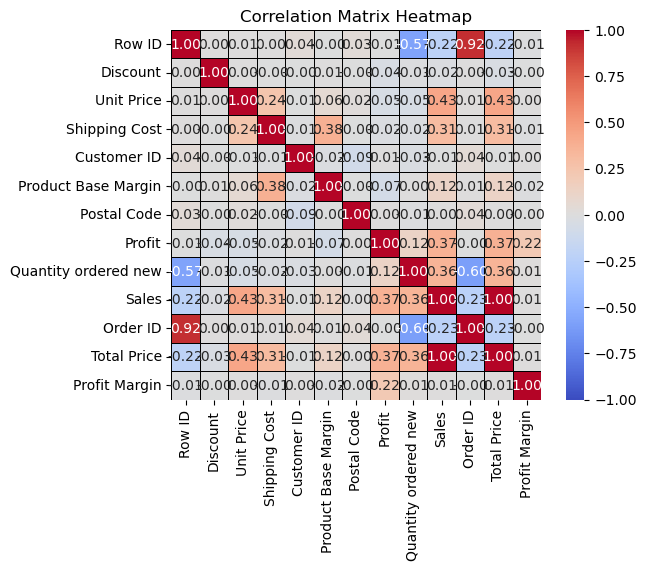

In [46]:
# Selecting only numeric columns for correlation matrix
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f',
            square=True, linewidths=0.5, linecolor='black')

# Set the title
plt.title('Correlation Matrix Heatmap')
plt.show()

In [47]:

import statsmodels.api as sm

# Example: Linear regression analysis for Sales prediction

# Not Covered part please change it



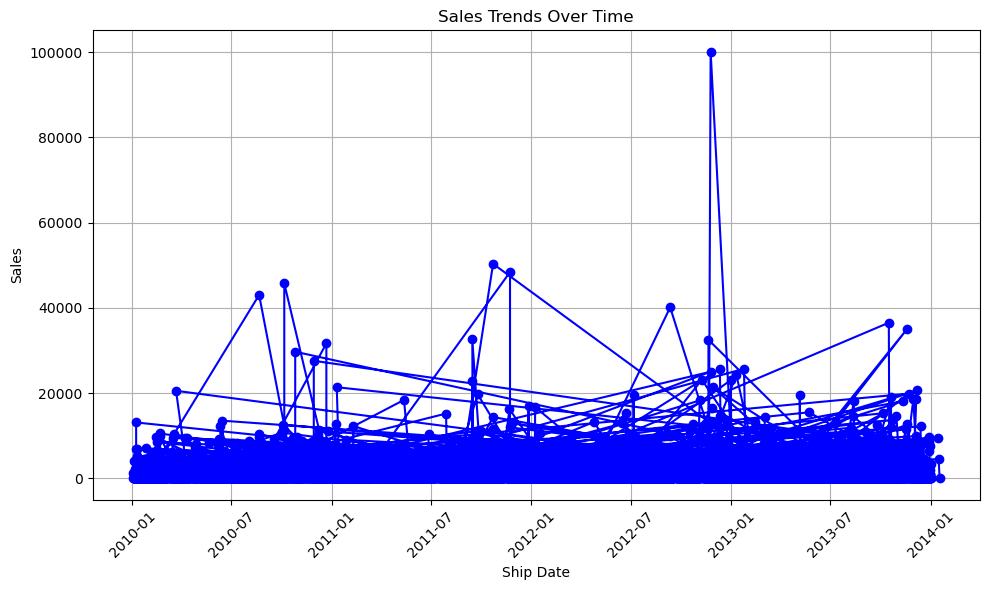

Monthly Sales:
 Ship Date
2010-01-31    117635.04
2010-02-28    142397.21
2010-03-31    145478.01
2010-04-30    113392.97
2010-05-31    100145.71
2010-06-30    120919.46
2010-07-31    127149.01
2010-08-31    203669.60
2010-09-30    107019.05
2010-10-31    268252.94
2010-11-30    203155.52
2010-12-31    213925.69
2011-01-31    126987.93
2011-02-28     87950.17
2011-03-31     65068.93
2011-04-30     73663.31
2011-05-31    144368.81
2011-06-30    119803.50
2011-07-31    120817.26
2011-08-31    117987.72
2011-09-30    284765.13
2011-10-31    260153.26
2011-11-30    319095.99
2011-12-31    195801.11
2012-01-31    125421.85
2012-02-29     97122.99
2012-03-31     94692.49
2012-04-30    111111.67
2012-05-31    161358.69
2012-06-30    129711.61
2012-07-31    160414.21
2012-08-31    122997.59
2012-09-30    187579.56
2012-10-31    181306.28
2012-11-30    516450.32
2012-12-31    280513.21
2013-01-31    203738.27
2013-02-28    127122.17
2013-03-31    200121.90
2013-04-30    146223.44
2013-05-31    

In [48]:

def plot_sales_trends(df):
    df = pd.DataFrame(df)
    # Convert 'Ship Date' to datetime
    df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

    # Set 'Ship Date' as the index
    df.set_index('Ship Date', inplace=True)

    # Plotting sales trends over time
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Sales'], marker='o', linestyle='-', color='b')
    plt.title('Sales Trends Over Time')
    plt.xlabel('Ship Date')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Resample sales data by month
    monthly_sales = df.resample('M')['Sales'].sum()
    print("Monthly Sales:\n", monthly_sales)



# Run the function 
plot_sales_trends(df)

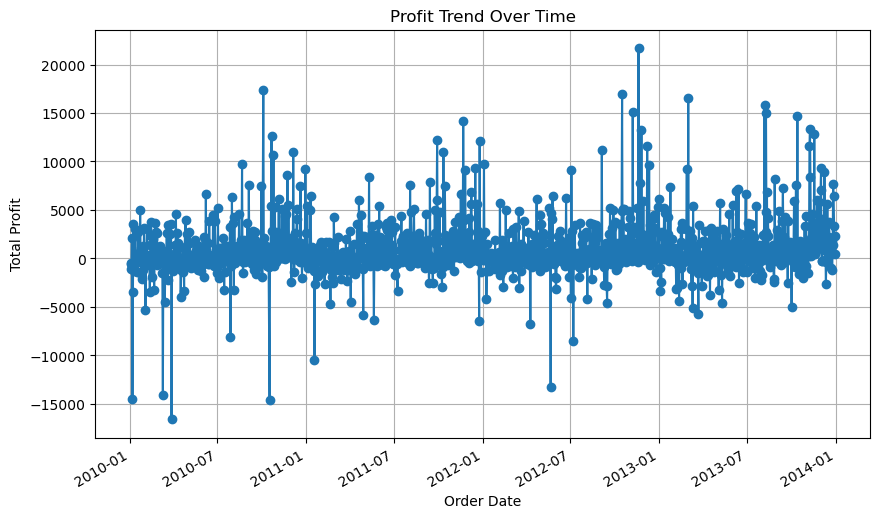

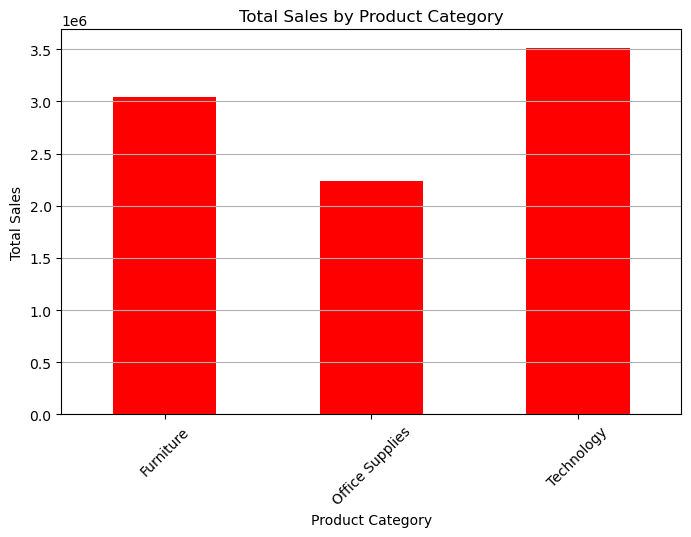

<Figure size 800x500 with 0 Axes>

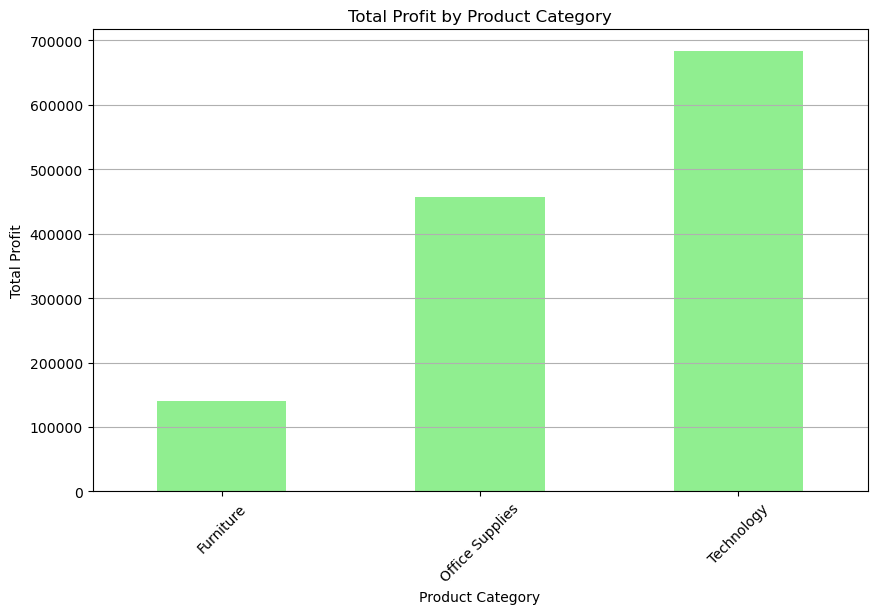

In [49]:

# Identifying top-performing product categories based on total sales and profit
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by 'Order Date' and sum up the profit
profit_trend = df.groupby('Order Date')['Profit'].sum()

#  Plot the profit trend
plt.figure(figsize=(10, 6))
profit_trend.plot(kind='line', marker='o')
plt.title('Profit Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

# Plotting total sales by product category
#  Group by 'Product Category' and sum up the sales
sales_by_category = df.groupby('Product Category')['Sales'].sum()

# Plot the sales by product category
plt.figure(figsize=(8, 5))
sales_by_category.plot(kind='bar', color='red')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plotting total profit by product category
# Group by 'Product Category' and sum up the profit
profit_by_category = df.groupby('Product Category')['Profit'].sum()

# Plot the profit by product category
plt.figure(figsize=(8, 5))
plt.figure(figsize=(10, 6))
profit_by_category.plot(kind='bar', color='lightgreen')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [50]:

# Generating summary statistics for each region
# Display summary statistics
# Group by 'Region'
grouped = df.groupby('Region')

#  Calculate the mean for each region
mean_stats = grouped.mean(numeric_only=True)
print("Mean Statistics:\n", mean_stats)

#Calculate the sum for each region
sum_stats = grouped.sum(numeric_only=True)
print("\nSum Statistics:\n", sum_stats)

# Calculate the count for each region
count_stats = grouped.count()
print("\nCount Statistics:\n", count_stats)


Mean Statistics:
                Row ID  Discount  Unit Price  Shipping Cost  Customer ID  \
Region                                                                    
Central  21014.190063  0.049312   80.213895      12.800434  1717.722029   
East     19126.691935  0.049903   81.131745      13.180502  1696.121199   
South    21167.875258  0.049294   84.777294      11.820381  2072.889691   
West     19597.648875  0.049722  106.279687      12.760101  1525.201147   

         Product Base Margin   Postal Code      Profit  Quantity ordered new  \
Region                                                                         
Central             0.512050  61438.421126  177.739563             13.143850   
East                0.517038  16981.262230  162.642110             15.163508   
South               0.506572  36350.336082   51.712562             11.997938   
West                0.512320  90389.294663  132.156623             14.771063   

               Sales      Order ID  Total Price  P

Correlation Coefficient between Sales and Profit: 0.37104419553361806


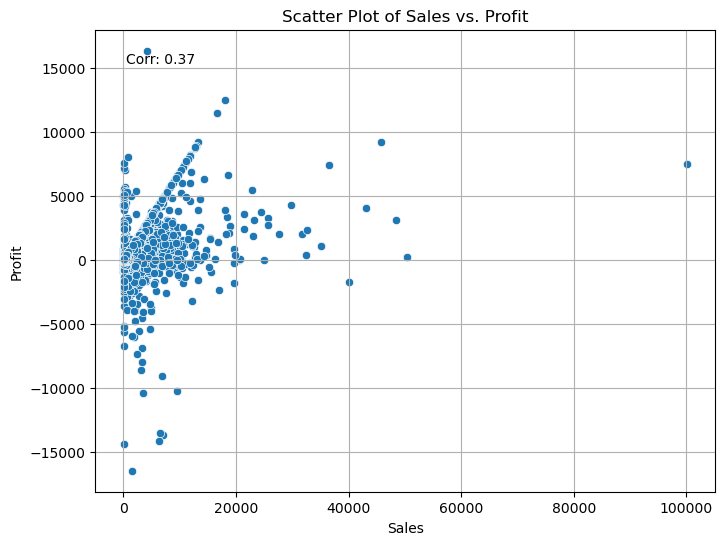

In [51]:

# Visualizing the correlation between sales and profit
# Calculate the correlation coefficient between Sales and Profit
correlation_coefficient = df['Sales'].corr(df['Profit'])
print("Correlation Coefficient between Sales and Profit:", correlation_coefficient)

# Visualize the correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Scatter Plot of Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)

# Displaying the correlation coefficient 
plt.text(0.05, 0.95, f'Corr: {correlation_coefficient:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.show()


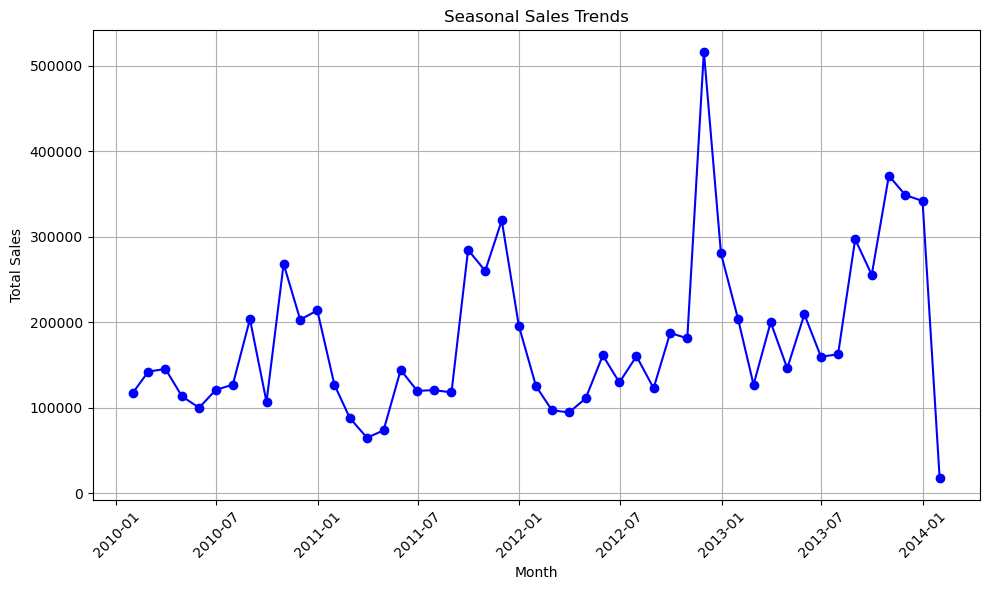

In [52]:
# Analyzing seasonal sales trends

# Convert 'Ship Date' to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Grouping sales data by month and year
df.set_index('Ship Date', inplace=True)
monthly_sales = df.resample('M')['Sales'].sum()

# Plotting seasonal sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




Sales by Ship Mode:
 Ship Mode
Delivery Truck    3650525.84
Express Air        674603.99
Regular Air       4464427.51
Name: Sales, dtype: float64


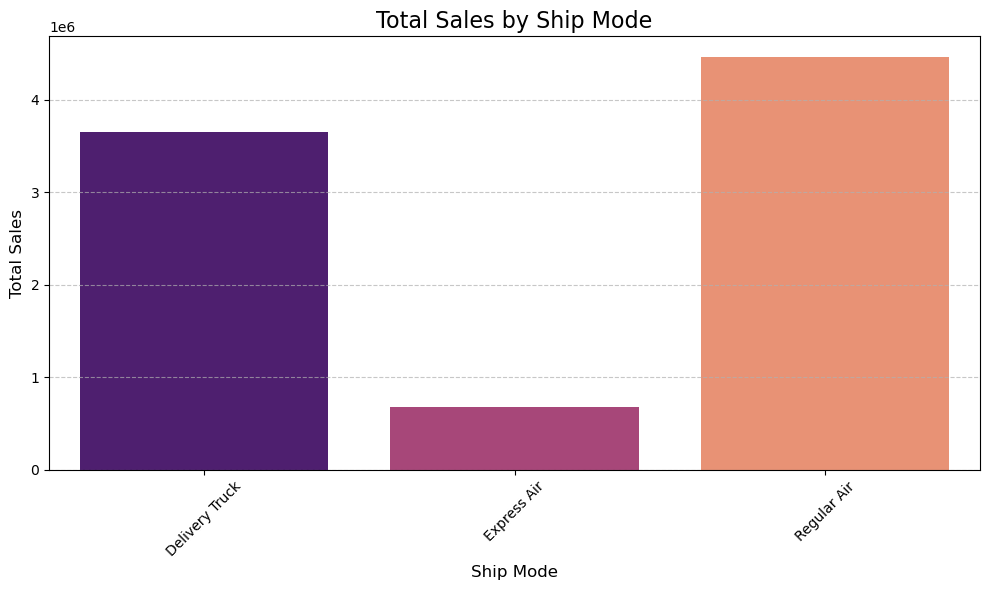

In [53]:

# Comparing sales across different ship modes
# Group by 'Ship Mode'
grouped = df.groupby('Ship Mode')

# Calculate total sales for each ship mode
sales_by_ship_mode = grouped['Sales'].sum()
print("Sales by Ship Mode:\n", sales_by_ship_mode)
# Plotting the total sales by ship mode
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_ship_mode.index, y=sales_by_ship_mode.values, palette='magma')

plt.title('Total Sales by Ship Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()